# Project: Portfolio - Final Project

**Instructions for Students:**

Please carefully follow these steps to complete and submit your assignment:

1. **Completing the Assignment**: You are required to work on and complete all tasks in the provided assignment. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: If you don't previously have a folder for collecting assignments, you must create a new folder in your Google Drive. This will be a repository for all your completed assignment files, helping you keep your work organized and easy to access.
   
3. **Uploading Completed Assignment**: Upon completion of your assignment, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your assignment Google Drive folder. This is crucial for the submission and evaluation of your assignment.
   
5. **Setting Permission toPublic**: Please make sure your **Google Drive folder is set to public**. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth assignment process for you and the reviewers.

**Description:**

Welcome to your final portfolio project assignment for AI Bootcamp. This is your chance to put all the skills and knowledge you've learned throughout the bootcamp into action by creating real-world AI application.

You have the freedom to create any application or model, be it text-based or image-based or even voice-based or multimodal.

To get you started, here are some ideas:

1. **Sentiment Analysis Application:** Develop an application that can determine sentiment (positive, negative, neutral) from text data like reviews or social media posts. You can use Natural Language Processing (NLP) libraries like NLTK or TextBlob, or more advanced pre-trained models from transformers library by Hugging Face, for your sentiment analysis model.

2. **Chatbot:** Design a chatbot serving a specific purpose such as customer service for a certain industry, a personal fitness coach, or a study helper. Libraries like ChatterBot or Dialogflow can assist in designing conversational agents.

3. **Predictive Text Application:** Develop a model that suggests the next word or sentence similar to predictive text on smartphone keyboards. You could use the transformers library by Hugging Face, which includes pre-trained models like GPT-2.

4. **Image Classification Application:** Create a model to distinguish between different types of flowers or fruits. For this type of image classification task, pre-trained models like ResNet or VGG from PyTorch or TensorFlow can be utilized.

5. **News Article Classifier:** Develop a text classification model that categorizes news articles into predefined categories. NLTK, SpaCy, and sklearn are valuable libraries for text pre-processing, feature extraction, and building classification models.

6. **Recommendation System:** Create a simplified recommendation system. For instance, a book or movie recommender based on user preferences. Python's Surprise library can assist in building effective recommendation systems.

7. **Plant Disease Detection:** Develop a model to identify diseases in plants using leaf images. This project requires a good understanding of convolutional neural networks (CNNs) and image processing. PyTorch, TensorFlow, and OpenCV are all great tools to use.

8. **Facial Expression Recognition:** Develop a model to classify human facial expressions. This involves complex feature extraction and classification algorithms. You might want to leverage deep learning libraries like TensorFlow or PyTorch, along with OpenCV for processing facial images.

9. **Chest X-Ray Interpretation:** Develop a model to detect abnormalities in chest X-ray images. This task may require understanding of specific features in such images. Again, TensorFlow and PyTorch for deep learning, and libraries like SciKit-Image or PIL for image processing, could be of use.

10. **Food Classification:** Develop a model to classify a variety of foods such as local Indonesian food. Pre-trained models like ResNet or VGG from PyTorch or TensorFlow can be a good starting point.

11. **Traffic Sign Recognition:** Design a model to recognize different traffic signs. This project has real-world applicability in self-driving car technology. Once more, you might utilize PyTorch or TensorFlow for the deep learning aspect, and OpenCV for image processing tasks.

**Submission:**

Please upload both your model and application to Huggingface or your own Github account for submission.

**Presentation:**

You are required to create a presentation to showcase your project, including the following details:

- The objective of your model.
- A comprehensive description of your model.
- The specific metrics used to measure your model's effectiveness.
- A brief overview of the dataset used, including its source, pre-processing steps, and any insights.
- An explanation of the methodology used in developing the model.
- A discussion on challenges faced, how they were handled, and your learnings from those.
- Suggestions for potential future improvements to the model.
- A functioning link to a demo of your model in action.

**Grading:**

Submissions will be manually graded, with a select few given the opportunity to present their projects in front of a panel of judges. This will provide valuable feedback, further enhancing your project and expanding your knowledge base.

Remember, consistent practice is the key to mastering these concepts. Apply your knowledge, ask questions when in doubt, and above all, enjoy the process. Best of luck to you all!


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# @title #### Student Identity
student_id = "REAWKEHY" # @param {type:"string"}
name = "Bernard Pouw" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1wNcP1fzRn1o7_MfwaMv8cGQONH-iMSqL?usp=sharing"  # @param {type:"string"}
assignment_id = "00_portfolio_project"

## Installation and Import `rggrader` Package

In [23]:
%pip install rggrader
from rggrader import submit_image
from rggrader import submit
!pip install tensorflow

## Working Space

In [24]:
# Write your code here
# Feel free to add new code block as needed
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [25]:
dataset_folder= "/content/sample_data/CK+48"
N_CLASSES = 7

In [26]:
sub_folders=os.listdir(dataset_folder)
sub_folders

['disgust', 'happy', 'anger', 'surprise', 'fear', 'sadness', 'contempt']

In [27]:
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  # Define labels basis use case.


  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(label))

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))

#     gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp = sift.detect(gray,None)
    img=cv2.drawKeypoints(gray,kp,image)
#     sift = cv2.SIFT_create()
#     kp = sift.detect(image,None)
#     image=cv2.drawKeypoints(image,kp,image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    images.append(img)
    labels.append(label)


    i+=1
  last.append(i)

/content/sample_data/CK+48/disgust/S070_005_00000015.png	0
/content/sample_data/CK+48/disgust/S085_004_00000015.png	0
/content/sample_data/CK+48/disgust/S078_007_00000013.png	0
/content/sample_data/CK+48/disgust/S111_007_00000013.png	0
/content/sample_data/CK+48/disgust/S061_004_00000021.png	0
/content/sample_data/CK+48/disgust/S070_005_00000016.png	0
/content/sample_data/CK+48/disgust/S045_004_00000015.png	0
/content/sample_data/CK+48/disgust/S074_004_00000017.png	0
/content/sample_data/CK+48/disgust/S130_012_00000011.png	0
/content/sample_data/CK+48/disgust/S054_004_00000022.png	0
/content/sample_data/CK+48/disgust/S102_009_00000013.png	0
/content/sample_data/CK+48/disgust/S134_008_00000013.png	0
/content/sample_data/CK+48/disgust/S106_004_00000007.png	0
/content/sample_data/CK+48/disgust/S056_002_00000009.png	0
/content/sample_data/CK+48/disgust/S097_004_00000029.png	0
/content/sample_data/CK+48/disgust/S131_010_00000017.png	0
/content/sample_data/CK+48/disgust/S069_003_00000011.png

In [28]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255

In [29]:
images_x.shape

(981, 48, 48, 3)

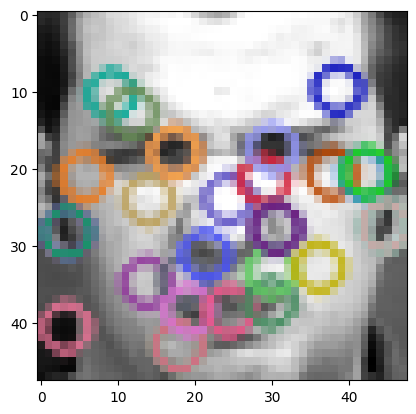

In [30]:
plt.imshow(images_x[133])
plt.axis('on')
plt.show()

In [31]:
# encoding the labels
num_of_classes = 7
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

In [32]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

In [33]:
len(X_train)

735

In [34]:
len(X_test)

246

In [35]:
input = Input(shape = (48,48,3))
conv1 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

flatten = Flatten()(pool3)

dense_1 = Dense(128,activation='relu')(flatten)
drop_1 = Dropout(0.2)(dense_1)
dense_2 = Dense(64,activation='relu')(drop_1)
dense_3 = Dense(16,activation='relu')(dense_2)
dense_4 = Dense(7,activation='relu')(dense_3)



output = Dense(7,activation="softmax")(dense_4)

In [36]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             119 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,560,063 (5.95 MB)

 Trainable params: 1,560,063 (5.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 779ms/step - accuracy: 0.2643 - loss: 1.9738 - val_accuracy: 0.2398 - val_loss: 1.9444
Epoch 2/10
 6/23 ━━━━━━━━━━━━━━━━━━━━ 8s 487ms/step - accuracy: 0.2345 - loss: 1.9380

In [ ]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

## Submit Notebook

In [ ]:
portfolio_link = ""
presentation_link = ""

question_id = "01_portfolio_link"
submit(student_id, name, assignment_id, str(portfolio_link), question_id, drive_link)

question_id = "02_presentation_link"
submit(student_id, name, assignment_id, str(presentation_link), question_id, drive_link)

# FIN